In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [75]:
loan = '/content/lending_club_loan_dataset.csv'
ld = pd.read_csv(loan)
ld.head()

,id,grade,annual_inc,short_emp,emp_length_num,home_ownership,dti,purpose,term,last_delinq_none,last_major_derog_none,revol_util,total_rec_late_fee,od_ratio,bad_loan
0,11454641,A,100000.0,1,1,RENT,26.27,credit_card,36 months,1,NaN,43.2,0.0,0.160624,0
1,9604874,A,83000.0,0,4,OWN,5.39,credit_card,36 months,0,NaN,21.5,0.0,0.810777,0
2,9684700,D,78000.0,0,11,MORTGAGE,18.45,debt_consolidation,60 months,1,NaN,46.3,0.0,0.035147,1
3,9695736,D,37536.0,0,6,MORTGAGE,12.28,medical,60 months,0,NaN,10.7,0.0,0.534887,1
4,9795013,D,65000.0,0,11,MORTGAGE,11.26,debt_consolidation,36 months,0,NaN,15.2,0.0,0.166500,0


In [76]:
#there are no duplicates in this dataset
ld.duplicated().sum()

0

In [77]:
#there is data missing in this dataset
ld.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     20000 non-null  int64  
 1   grade                  20000 non-null  object 
 2   annual_inc             20000 non-null  float64
 3   short_emp              20000 non-null  int64  
 4   emp_length_num         20000 non-null  int64  
 5   home_ownership         18509 non-null  object 
 6   dti                    19846 non-null  float64
 7   purpose                20000 non-null  object 
 8   term                   20000 non-null  object 
 9   last_delinq_none       20000 non-null  int64  
 10  last_major_derog_none  574 non-null    float64
 11  revol_util             20000 non-null  float64
 12  total_rec_late_fee     20000 non-null  float64
 13  od_ratio               20000 non-null  float64
 14  bad_loan               20000 non-null  int64  
dtypes:

In [78]:
ld.isna().sum()

id                           0
grade                        0
annual_inc                   0
short_emp                    0
emp_length_num               0
home_ownership            1491
dti                        154
purpose                      0
term                         0
last_delinq_none             0
last_major_derog_none    19426
revol_util                   0
total_rec_late_fee           0
od_ratio                     0
bad_loan                     0
dtype: int64

In [79]:
#remove the "last_major_derog_none" column from the dataset due to a large 
#portion of missing data.
ld = ld.drop(columns=['last_major_derog_none','id'])

In [80]:
ld['home_ownership'].value_counts()

MORTGAGE    9844
RENT        7052
OWN         1613
Name: home_ownership, dtype: int64

In [81]:
#use the most frequent value in the "home_ownership" column for missing data.
ld['home_ownership'].fillna('MORTGAGE', inplace=True)

In [82]:
#use the mean value of the "dti" column for missing data for consistency.
ld['dti'].fillna(ld['dti'].mean(), inplace=True)
ld.isna().sum()

grade                 0
annual_inc            0
short_emp             0
emp_length_num        0
home_ownership        0
dti                   0
purpose               0
term                  0
last_delinq_none      0
revol_util            0
total_rec_late_fee    0
od_ratio              0
bad_loan              0
dtype: int64

In [83]:
categories = ["grade", "annual_inc", "short_emp", "emp_length_num",
              "home_ownership", "dti", "purpose", "term", "last_delinq_none",
              "revol_util", "total_rec_late_fee", "od_ratio", "bad_loan"]
for values in categories:
  print("\n", values)
  print(ld[values].value_counts())


 grade
B    6042
C    5566
D    3554
A    2159
E    1645
F     865
G     169
Name: grade, dtype: int64

 annual_inc
60000.0     787
50000.0     735
65000.0     609
70000.0     608
80000.0     548
           ... 
112711.0      1
66389.0       1
62212.0       1
44289.0       1
93250.0       1
Name: annual_inc, Length: 2566, dtype: int64

 short_emp
0    17750
1     2250
Name: short_emp, dtype: int64

 emp_length_num
11    6530
3     1732
4     1501
1     1453
6     1405
8     1316
7     1246
2     1227
5     1026
9      989
0      797
10     778
Name: emp_length_num, dtype: int64

 home_ownership
MORTGAGE    11335
RENT         7052
OWN          1613
Name: home_ownership, dtype: int64

 dti
16.587841    154
15.870000     20
19.640000     20
11.450000     19
19.250000     19
            ... 
33.270000      1
3.180000       1
2.630000       1
33.440000      1
32.530000      1
Name: dti, Length: 3296, dtype: int64

 purpose
debt_consolidation    12337
credit_card            4137
home_improv

In [84]:
#fix inconsistency in "term" column
ld['term'] = ld['term'].replace([' 36 Months'], ' 36 months')

In [85]:
ld['term'].value_counts()

 36 months    15001
 60 months     4999
Name: term, dtype: int64

In [86]:
ld.dtypes

grade                  object
annual_inc            float64
short_emp               int64
emp_length_num          int64
home_ownership         object
dti                   float64
purpose                object
term                   object
last_delinq_none        int64
revol_util            float64
total_rec_late_fee    float64
od_ratio              float64
bad_loan                int64
dtype: object

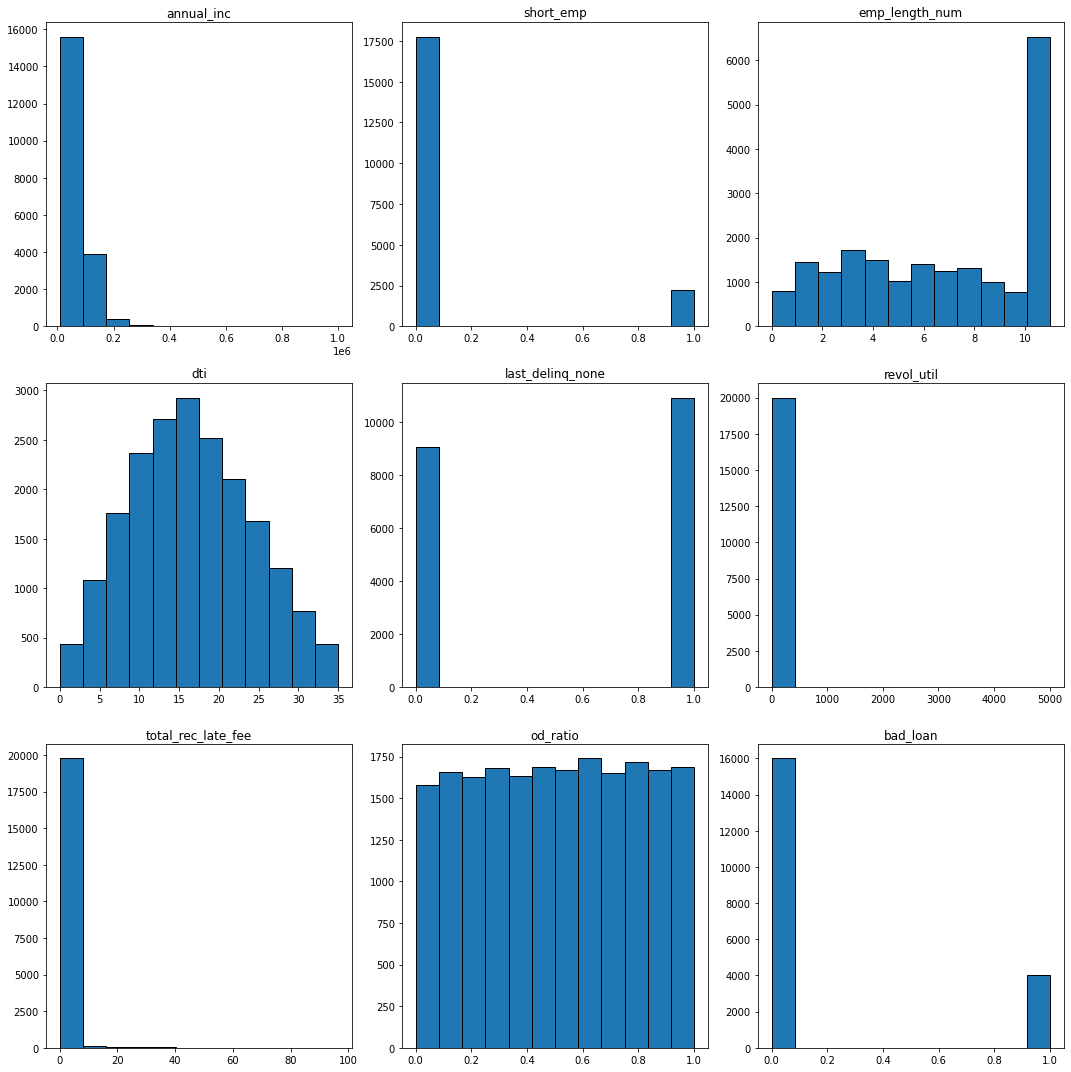

In [87]:
#The graphs below show the count for all numerical data in the dataset.
#We can identify the outliers in these graphs by the difference of one value
#when compared to the other values.
ld.hist(figsize=(15,15), bins=12, ec='black', grid=False)
plt.tight_layout()

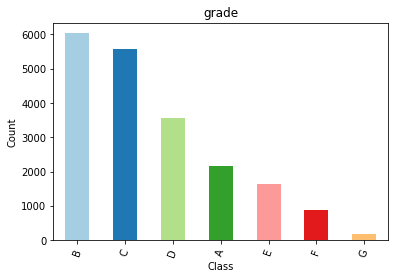

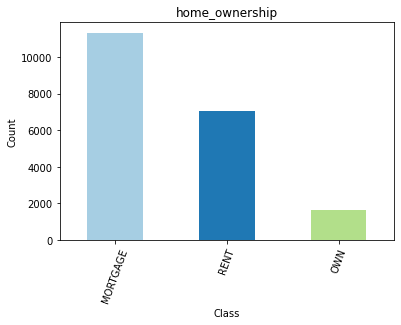

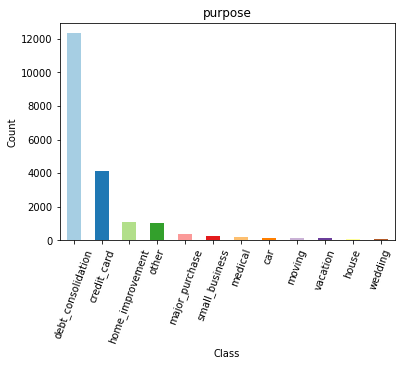

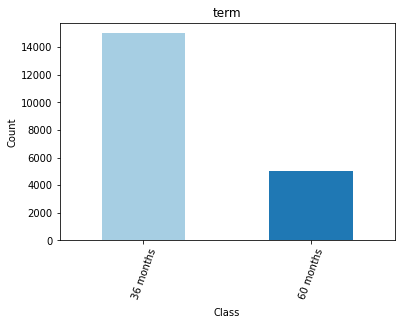

In [88]:
#The graphs below show the count for all categorical data in the dataset.
#We can identify the outliers in these graphs by the difference of one value
#when compared to the other values.
for column in ld.select_dtypes(include=['object']).columns:
  ld[column].value_counts().plot(kind='bar', color=sns.color_palette('Paired'))

  plt.xlabel('Class')
  plt.xticks(rotation=70, horizontalalignment='center')
  plt.ylabel('Count')
  plt.title(column)
  plt.show()